In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="ticks")

# SAAS RP Project Spring 2021: Sexual Education and its Effects on LGBT Communities in the US

## <span style="color:red">Table of Contents</span>
### 0) - <span style="color:orange">Goals, Intent, and Methods</span>
    0.1 - Methods and Partial Abstract
### 1) - <span style="color:rgb(224, 203, 13)">Data Importation and Cleaning</span>
    1.1 - LGBT Population Data (2019)
    1.2 - Sexual Education Policy Data (2021)
    1.3 - Merging Data
### 2) - <span style="color:green">Preliminary Data Exploration and Plotting</span>
    2.1 - Numerical Exploration
    2.2 - Specific graphings of data
    2.3 - Specific graphings of data against my indices
### 3) - <span style="color:blue">PCA and Starting Modeling</span>
    3.1 - Preliminary PCA and PCA visualization
    3.2 - Beginning Feature Identification
### 4) - <span style="color:rgb(166, 0, 222)"> Feature Selection and Classification </span>
    4.1 - Feature Selection
    4.2 - Modeling Using Classification with PCA
    4.3 - Feature Selection Classification (5 Best Features by RFE)
### 5) - <span style="color:rgb(227, 3, 252)"> A/B Testing and Statistical Significance </span>
    5.1 - Permutation test for significance of features
### 6) - <span style="color:rgb(85, 1, 94)"> Concluding Thoughts and Plots </span>

# 0 - Goals, Intents, and Methods

## 0.1 - Methods and Partial Abstract

### <span style="color:blue">**Statement of Intent and Goals**</span>
**Intent and Purpose**

This notebook, eventually to be summarized and formatting into a full-length research paper, is based on a curiosity I arrived at through my own lived experience. Growing up in Arkansas in the American south before moving to California for college, I found the experience of being a member of the LGBTQ+ community vastly different in the two spaces. This led me to begin to assess what major, measurable cultural factors contributed to this. Immediately, I realized my lacking sexual education was in stark contrast to Berkeley's sex positivity and culture of conversation around sexual taboos. This prompted me to further explore the relationship between sexual education and LGBT population.

**Goals**

Thus, I sought to leverage census and population data alongside sexual education policy data in order to assess the statistical significance of the difference in LGBTQ+ populations across states, build a classifier based on sexual education features to predict LGBTQ+ population in a given state, and ultimately arrive at a conclusion as to what factors are most impactful on the LGBTQ+ population.

In short, this paper attempts to:
- examine correlation between sexual education policies and LGBT populations across the United States
- identify the major predictors of LGBT population from the examined features
- assess whether this correlation is representative of a real causation, or simply related symptoms of a deeper cultural predictor


### <span style="color:blue">**Methods**</span>
**Data Collection**

Data collection was done through 3 main sources, *Missouri.edu*'s collection of national sexual education data, *Guttmacher.org*'s tables of state-based sexual education data, and *Williamsinstitute.law.ucla.edu*'s summary of LGBT populations courtesy of largely Gallup surveys and the now defunct *data.census.gov* data based on the 2010 census. The Williams' institute data was manually entered from an unscannable pdf, and the Guttmacher data was downloaded to CSV, imported, and cleaned in this notebook. 


**Data Analysis**

Data analysis began with graphing features of the dataset to begin to ascertain trends and relationships. Initially, it was obvious that largely binary features can be problematic for classification and prediction, so I began to create indices manually built off of what I presumed to be the most significant features. 

At that point, I decided to make an effort to predict a binary value of "high" or "low" LGBT population relative to a statewide mean. This was further refined with RFE feature selection to identify which features best predicted the binary classification, and then with PCA to understand if a classification boundary was uniformly possible. 



# 1 - Data Importation and Cleaning

## 1.1 - LGBT Population Data - 2019

In [2]:
# CSV conversion of this pdf wasn't working, so manual data entry below
percentLGBT = np.array([4.5, 3.1, 3.7, 4.5, 3.3, 5.3, 4.6, 3.9, 4.5, 9.8, 4.6, 4.5, 4.6, 2.8, 4.3, 4.5, 3.6, 3.3, 3.4, 3.9, 4.9,
                            4.2, 5.4, 4.0, 4.1, 3.5, 3.8, 2.9, 3.8, 5.5, 4.7, 4.1, 4.5, 5.1, 4.0, 2.7, 4.3, 3.8, 5.6, 4.1, 
                            4.5, 3.5, 3.0, 3.5, 4.1, 3.7, 5.2, 3.9, 5.2, 4.0, 3.8, 3.3])
statelabels = np.array(["US", "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", 
                  "District of Columbia", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas",
                  "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", 
                  "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", 
                  "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina",
                  "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", 
                  "Wisconsin", "Wyoming"])
regionlabels = np.array(["NaN", "Southeast", "West", "Southwest", "Southeast", "West", "West", "Northeast", "Northeast", 
                        "Northeast", "Southeast", "Southeast", "West", "West", "Midwest", "Midwest",  "Midwest", "Midwest",
                        "Southeast", "Southeast", "Northeast", "Northeast", "Northeast", "Midwest", "Midwest", "Southeast",
                        "Midwest", "West", "Midwest", "West", "Northeast", "Northeast", "Southwest", "Northeast",
                        "Southeast", "Midwest", "Midwest", "Southwest", "West", "Northeast", "Northeast", "Southeast",
                        "Midwest", "Southeast", "Southwest", "West", "Northeast", "Southeast", "West", "Southeast",
                        "Midwest", "West"])

popLGBTraw = np.array([11343, 117, 21, 242, 76, 1615, 200, 111, 34, 56, 772, 356, 52, 36, 426, 229, 87, 73, 117, 139, 53,
                   198, 296, 311, 175, 79, 180, 24, 55, 127, 51, 288, 72, 800, 319, 16, 389, 113, 183, 416, 38, 137, 20, 
                   182, 858, 80, 26, 257, 300, 58, 171, 15])
popLGBraw = np.array([10388, 101, 19, 220, 66, 1458, 185, 102, 31, 45, 700, 316, 46, 32, 390, 209, 82, 66, 104, 124, 49, 182,
                  275, 288, 158, 70, 162, 22, 51, 118, 48, 266, 64, 744, 287, 14, 361, 100, 169, 384, 35, 122, 18, 160, 768,
                  75, 24, 233, 276, 53, 158, 14])

popTraw = np.array([1397.2, 22.5, 2.7, 30.6, 13.4, 218.4, 20.9, 12.4, 4.6, 14.6, 100.3, 55.7, 8.5, 4.8, 49.8, 27.6, 7.4, 9.3,
                   17.7, 20.9, 5.4, 22.3, 29.9, 32.9, 24.3, 13.7, 25.1, 2.7, 5.4, 12.7, 4.5, 30.1, 11.8, 78.6, 44.8,
                   1.7, 40, 18.4, 19.8, 43.8, 4.3, 21, 2.2, 31.2, 125.4, 7.2, 3, 34.5, 32.9, 6.1, 19.2, 1.4])


popLGBT = popLGBTraw * 1000
popLGB = popLGBraw * 1000
popT = popTraw * 1000
popTotal = popLGBT / percentLGBT #note: these population values aren't exactly accurate due to ranges of percentage values

percentLGB = popLGB / popTotal
percentT = popT / popTotal

macroregionlabels = []
for i in regionlabels:
    if i == "NaN":
        macroregionlabels.append("NaN")
    elif i == "Midwest" or i == "West":
        macroregionlabels.append("West")
    elif i == "Southwest" or i == "Southeast":
        macroregionlabels.append("South")
    elif i == "Northeast":
        macroregionlabels.append("Northeast")
    else:
        macroregionlabels.append("NaN")

In [3]:
# sanity checks
print(sum(popLGBraw > popLGBTraw) == 0) #ensures all values for popLGB are less than popLGBT
print(sum(popTraw > popLGBTraw) == 0) #ensures all values for popT are less than popLGBT
print(len(percentLGBT) == len(statelabels) == len(popLGBTraw) == len(popLGBraw)) #ensures equal length arrays

True
True
True


In [4]:
datadictionary = {'State' : statelabels, 'Region' : regionlabels, 'Macro Region' : macroregionlabels, '% LGBT' : percentLGBT, 
                  '% Lesbian, Gay, Bisexual' : percentLGB, '% Transgender' : percentT, 'LGBT population' : popLGBT, 
                  'Lesbian, Gay, Bisexual Population' : popLGB, 'Transgender Population' : popT}

LGBTdata = pd.DataFrame(data = datadictionary)
# LGBTdata

## 1.2 - State Sexual Education Policy Data (February, 2021)

### 1.2.1 - General Policies

In [5]:
#CSV import of sexual education state legislation data - general requirements
generalpolicyraw = pd.read_csv("Sex Ed policies general requirements2.csv")

In [6]:
#Cleaning general policy
reallabels = generalpolicyraw.iloc[0,]
reallabels[5] = "Parental Notice"
reallabels[0] = "State"
generalpolicyraw.columns = reallabels #reassigns labels to intended values
generalpolicyintermediate = generalpolicyraw.iloc[1:, 0:8] #drops extraneous columns
generalpolicyintermediate = generalpolicyintermediate.fillna(0) #changes formatting from Nan and X to 0 and 1 for true and false
generalpolicyintermediate = generalpolicyintermediate.replace("X", 1)
generalpolicyintermediate = generalpolicyintermediate.replace("HIV", 0)
generalpolicyintermediate.iloc[14,0] = "Indiana" #fixes various formatting issues
generalpolicyintermediate.iloc[24,0] = "Mississippi"
generalpolicyintermediate.iloc[42,0] = "Utah"
generalpolicy = generalpolicyintermediate

for i in reallabels[1:7]: #changes all data types to be numeric
    generalpolicy[i] = generalpolicy[i].astype(int)
# generalpolicy #fully cleaned

### 1.2.2 - Content Requirement Policies

In [7]:
contentrequirementsraw = pd.read_csv("Sex Ed policies content requirements2.csv")

In [8]:
#Cleaning content policy
contentrequirementsraw
reallabels = contentrequirementsraw.iloc[0,]
reallabels[0] = "State"
reallabels[2] = "HIV/STI: Stresses abstinence"
reallabels[3] = "HIV/STI: sex only in marriage"
reallabels[7] = "Stresses abstinence"
contentrequirementsraw.columns = reallabels #reassigns labels to intended values
contentrequirementsintermediate = contentrequirementsraw[1:]
contentrequirementsintermediate = contentrequirementsintermediate.fillna(0)
contentrequirementsintermediate = contentrequirementsintermediate.replace("X", 1)
contentrequirementsintermediate = contentrequirementsintermediate.replace("Negative", -1) #reassigns notations of negative and positive view to numerics
contentrequirementsintermediate = contentrequirementsintermediate.replace("Inclusive", 1)
contentrequirementsintermediate = contentrequirementsintermediate.replace("ᶲ", -1) #fixes an odd notation error
contentrequirementsintermediate = contentrequirementsintermediate.replace("Stress", 1) #converts notions of stress & coverage to numerics
contentrequirementsintermediate = contentrequirementsintermediate.replace("Cover", 0)
contentrequirementsintermediate.iloc[2, 2] = 1 #not sure why .replace() failed but manual replacement in trouble areas
contentrequirementsintermediate.iloc[3, 2] = 0
contentrequirementsintermediate.iloc[1, 2] = 1
contentrequirementsintermediate.iloc[16, 2] = 1
contentrequirementsintermediate.iloc[17, 2] = 1
contentrequirementsintermediate.iloc[18, 2] = 0
contentrequirementsintermediate.iloc[19, 2] = 0
contentrequirementsintermediate.iloc[21, 2] = 1
contentrequirementsintermediate.iloc[24, 2] = 1
contentrequirementsintermediate.iloc[33, 2] = 1
contentrequirementsintermediate.iloc[34, 2] = 1
contentrequirementsintermediate.iloc[36, 2] = 1
contentrequirementsintermediate.iloc[38, 2] = 1
contentrequirementsintermediate.iloc[18, 4] = 1
contentpolicy = contentrequirementsintermediate

for i in reallabels[1:7]: #changes all data types to be numeric
    contentpolicy[i] = contentpolicy[i].astype(int)
# contentpolicy #fully cleaned

### 1.2.3 - Skills and Relationships Training Policies

In [9]:
skillsnrelationshipsraw = pd.read_csv("Sex Ed policies life skills and sexual violence prevention.csv")

In [10]:
#cleaning skills and relationship skills content
skillsnrelateintermediate = skillsnrelationshipsraw[:-1]
skillsnrelateintermediate = skillsnrelateintermediate.fillna(0)
skillsnrelateintermediate = skillsnrelateintermediate.replace("X", 1)
skillsnrelations = skillsnrelateintermediate
#skillsnrelations #fully cleaned

## 1.3 - Merging Data and Creating Indices

In [11]:
# Taking meaningful data from the above 3 tables
sexedpolicy = generalpolicy.merge(contentpolicy, how="left").merge(skillsnrelations, how="left")
sexedpolicy = sexedpolicy.fillna(0)

# The "Religious / Cultural Pressure Index" (0 to 6)
religiouspressure = (1 - sexedpolicy['Must Be Culturally Appropriate and Unbiased'].to_numpy()) #adds 1 if NOT culturally unbiased
religiouspressure = religiouspressure + (1 - sexedpolicy["Cannot Promote Religion"].to_numpy()) #adds 1 if CAN promote religion
religiouspressure = religiouspressure + (1 - sexedpolicy["Contraception"].to_numpy()) #adds 1 if does NOT cover contraception
religiouspressure = religiouspressure + sexedpolicy["HIV/STI: Stresses abstinence"].to_numpy()  #adds 1 if stresses abstinence
religiouspressure = religiouspressure + (1 - sexedpolicy["HIV/STI includes: Sexual orientation"].to_numpy()) #adds 2 if portrays sexual orientation negatively, 1 if not at all

sexedpolicy['Religious / Cultural Pressure Index'] = religiouspressure

# The 'Inclusivity / SVSH Awareness Index' (0 to 7)
inclusivity = sexedpolicy['Must Be Culturally Appropriate and Unbiased'].to_numpy() #adds 1 if culturally unbiased
inclusivity = inclusivity + sexedpolicy['HIV/STI includes: Sexual orientation'].to_numpy() #adds -1 if negatively portrays sexuality, 0 if none, 1 if inclusively
inclusivity = inclusivity + sexedpolicy['Contraception'].to_numpy() #adds 1 if shows some usage of contraception
inclusivity = inclusivity + sexedpolicy['Healthy relationships'].to_numpy() #adds 1 if discusses healthy relationships
inclusivity = inclusivity + sexedpolicy['Refusal skills and personal boundaries'].to_numpy() #adds 1 if boundaries are discussed
inclusivity = inclusivity + sexedpolicy['Dating and sexual violence prevention'].to_numpy() #adds 1 if SVSH is discussed
inclusivity = inclusivity + 1 #to change from (-1 to 6) to (0 to 7)

sexedpolicy['Inclusivity / SVSH Awareness Index'] = inclusivity

#Simplifying the table to remove redundant and unhelpful data
sexedpolicy = sexedpolicy.drop(['Sex Ed: Be Medically Accurate', 'HIV: Be Age Appropriate',
       'Must Be Culturally Appropriate and Unbiased', 'Parental Notice', 'HIV/STI: sex only in marriage',
                 'Negative outcomes of teen sex', 'Healthy relationships', 'Sexual decision-making and self-discipline'], axis = 1)

# sexedpolicy

In [12]:
#Merging Numeric Data with Policy Data
PolicyAndLGBT = LGBTdata.merge(sexedpolicy, how="left")[1:]

#There are 3 states that don't have meaningful data, so those were removed
# PolicyAndLGBT.drop[]
PolicyAndLGBT.head()

,State,Region,Macro Region,% LGBT,"% Lesbian, Gay, Bisexual",% Transgender,LGBT population,"Lesbian, Gay, Bisexual Population",Transgender Population,Cannot Promote Religion,...,Opt-out allowed,Contraception,HIV/STI: Stresses abstinence,HIV/STI includes: Sexual orientation,Condoms,Stresses abstinence,Refusal skills and personal boundaries,Dating and sexual violence prevention,Religious / Cultural Pressure Index,Inclusivity / SVSH Awareness Index
1,Alabama,Southeast,South,3.1,2.676068,0.596154,117000,101000,22500.0,1.0,...,0.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,4.0,3.0
2,Alaska,West,West,3.7,3.347619,0.475714,21000,19000,2700.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0
3,Arizona,Southwest,South,4.5,4.090909,0.569008,242000,220000,30600.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,4.0,4.0
4,Arkansas,Southeast,South,3.3,2.865789,0.581842,76000,66000,13400.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,5.0,4.0
5,California,West,West,5.3,4.784768,0.716731,1615000,1458000,218400.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,7.0


## <span style="color:blue"> Thoughts: </span>
- There may be some error in population values, especially considering some states are represented by n = as low as 300 respondents, but general trends seem reasonable and relevant to population data that is known to be accurate
- An initial realization: Population LGB and Population T do **not** add to population LGBT, due to overlap between the two groups. With this insight in mind, the LGB and T populations are not used as carelessly as the LGBT population
- **Created indices**: The RCP Index and the ISA Index were created after cleaning feature data to try and encapsulate what I expect to be the most significant features in a non-binary way 

# 2 - Data Exploration and Plotting

## 2.1 - Numerical Exploration

In [13]:
print("Religious Pressure Index Average: ", np.mean(PolicyAndLGBT["Religious / Cultural Pressure Index"]))
print("Inclusivity Awareness Index Average: ", np.mean(PolicyAndLGBT["Inclusivity / SVSH Awareness Index"]))
print("Mean % LGBT: ", np.mean(PolicyAndLGBT["% LGBT"]))
print("Total % LGBT: ", sexedpolicy.iloc[0,2])
print("Mean % LGB: ", np.mean(PolicyAndLGBT['% Lesbian, Gay, Bisexual']))
print("Total % LGB: ", sexedpolicy.iloc[0,3])
print("Mean % Transgender: ", np.mean(PolicyAndLGBT["% Transgender"]))
print("Total % Transgender: ", sexedpolicy.iloc[0,4])

Religious Pressure Index Average:  3.1914893617021276
Inclusivity Awareness Index Average:  3.276595744680851
Mean % LGBT:  4.2137254901960794
Total % LGBT:  0
Mean % LGB:  3.816105081477805
Total % LGB:  0
Mean % Transgender:  0.5490483235981694
Total % Transgender:  1.0


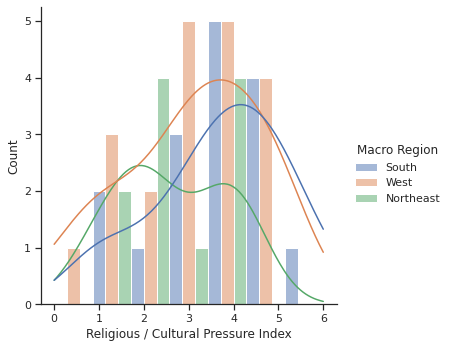

In [14]:
sns.displot(x = PolicyAndLGBT["Religious / Cultural Pressure Index"], hue = PolicyAndLGBT['Macro Region'], multiple = "dodge", kde=True)

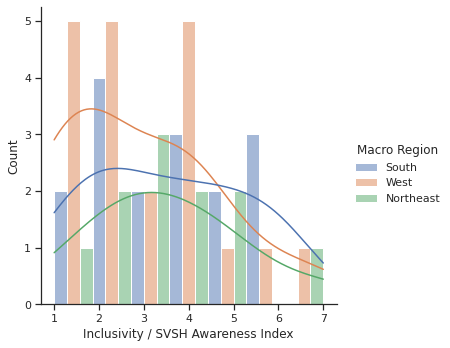

In [15]:
sns.displot(x = PolicyAndLGBT['Inclusivity / SVSH Awareness Index'], hue = PolicyAndLGBT['Macro Region'], multiple = "dodge", kde=True)

<AxesSubplot:xlabel='% LGBT', ylabel='Macro Region'>

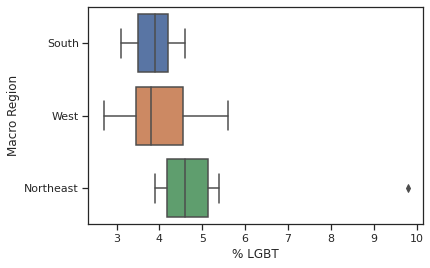

In [16]:
sns.boxplot(data = PolicyAndLGBT, y = "Macro Region", x = "% LGBT")

### Preliminary thoughts and motivations:
It seems that the indices that I've created are somewhat representative

## 2.2 - % LGBT Against Religious and Inclusivity Indices

Text(0.5, 1.0, 'Religious and Cultural Pressure vs. % LGBT Population')

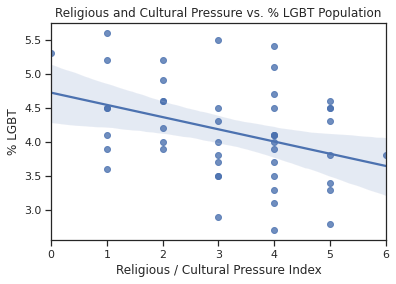

In [17]:
sns.regplot(data = PolicyAndLGBT, x = "Religious / Cultural Pressure Index", y = "% LGBT")
plt.title("Religious and Cultural Pressure vs. % LGBT Population")

Text(0.5, 1.0, 'Religious and Cultural Pressure vs. % LGBT Population')

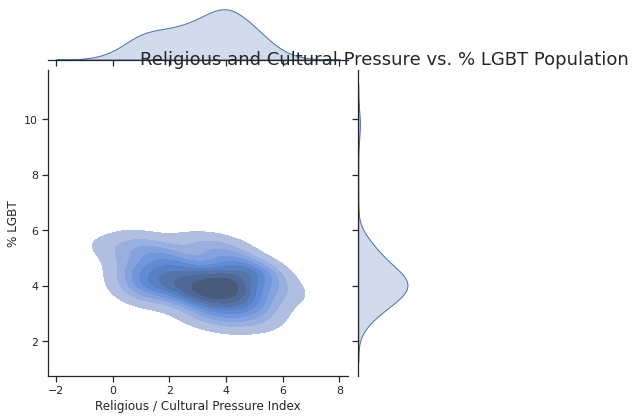

In [18]:
sns.jointplot(data = PolicyAndLGBT, x = "Religious / Cultural Pressure Index", y = "% LGBT", kind = 'kde', fill = True)
plt.title("Religious and Cultural Pressure vs. % LGBT Population", size = 18)

Text(0.5, 1.0, 'Inclusivity Index vs. % LGBT Population')

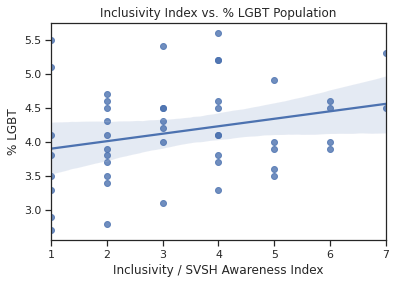

In [19]:
sns.regplot(data = PolicyAndLGBT, x = "Inclusivity / SVSH Awareness Index", y = "% LGBT")
plt.title("Inclusivity Index vs. % LGBT Population")

Text(0.5, 1.0, 'Inclusivity Index vs. % LGBT Population')

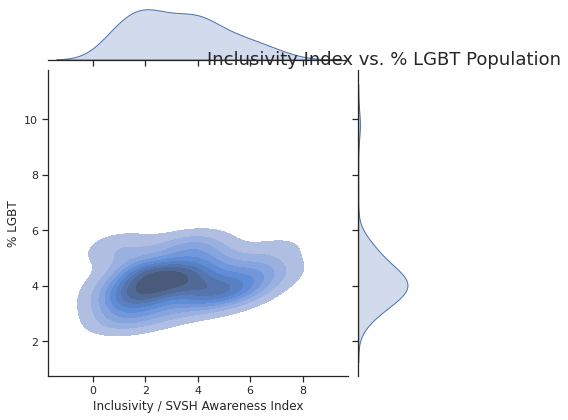

In [20]:
sns.jointplot(data = PolicyAndLGBT, x = "Inclusivity / SVSH Awareness Index", y = "% LGBT", kind = 'kde', fill = True)
plt.title("Inclusivity Index vs. % LGBT Population", size = 18)

### 2.2.1 - % Transgender and % LGB Against  Religious and Inclusivity Indices

Text(0.5, 1.0, 'Religious and Cultural Pressure vs. % Transgender Population')

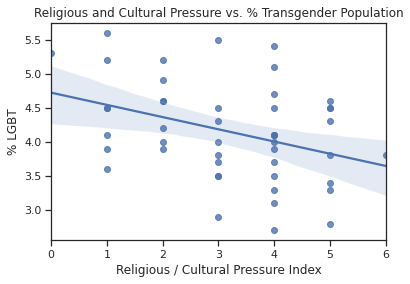

In [21]:
sns.regplot(data = PolicyAndLGBT, x = "Religious / Cultural Pressure Index", y = "% LGBT")
plt.title("Religious and Cultural Pressure vs. % Transgender Population")

Text(0.5, 1.0, 'RCP Index vs. ISA Index')

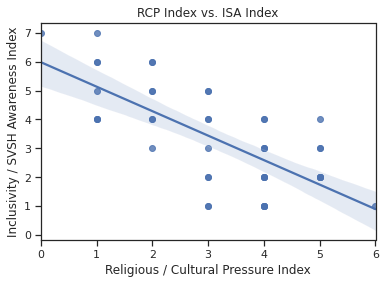

In [22]:
sns.regplot(data = PolicyAndLGBT, x = "Religious / Cultural Pressure Index", y = "Inclusivity / SVSH Awareness Index")
plt.title("RCP Index vs. ISA Index")

## 2.3 - Further Exploration and Regional Breakdown

<AxesSubplot:xlabel='Religious / Cultural Pressure Index', ylabel='% LGBT'>

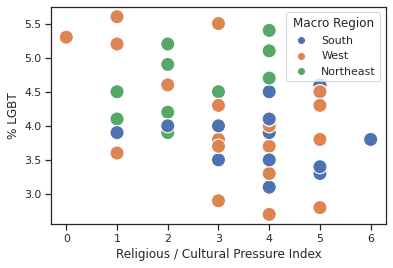

In [23]:
# fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data = PolicyAndLGBT, x = "Religious / Cultural Pressure Index", y = "% LGBT", 
                hue = "Macro Region", s = 200)

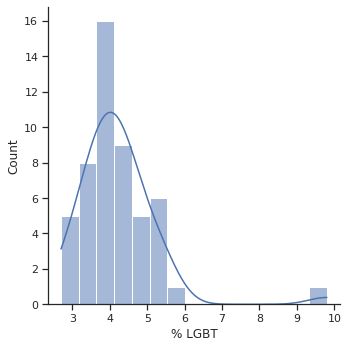

In [24]:
sns.displot(x = PolicyAndLGBT["% LGBT"], kde=True)

<AxesSubplot:xlabel='Religious / Cultural Pressure Index', ylabel='% LGBT'>

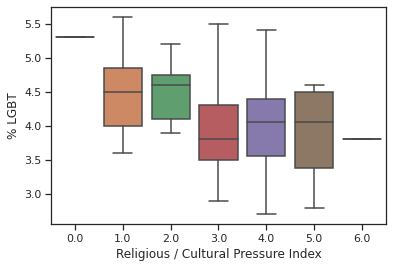

In [25]:
sns.boxplot(data = PolicyAndLGBT, x = "Religious / Cultural Pressure Index", y = "% LGBT")

## <span style="color:blue"> Thoughts: </span>

**Major Takeaways:**
- the ISA index and RCP index both seem meaningful in predictive power, but both also seem to be **strongly correlated**, potentially expressing the same information
- Region seems less present when used as a hue against these indices, but seems to be a strong predictor by average % LGBT when graphed by itself
- **LGBT Population Distribution:** aside from a few notable outliers, the trends of LGBT population seem relatively consistent across macro region, but by state yield more meaningful information

# 3.0 - PCA and Starting Modeling

In [26]:
#sns.pairplot(PolicyAndLGBT)

## 3.1 - Preliminary PCA and PCA visualization

In [27]:
cleanedPAL = PolicyAndLGBT.iloc[:, 3:-2].drop(['% Lesbian, Gay, Bisexual', '% Transgender',
                                              'LGBT population', 'Lesbian, Gay, Bisexual Population', 
                                              'Transgender Population'], axis = 1).drop(9).drop(28).drop(42).drop(51)
centeredPAL = cleanedPAL - np.mean(cleanedPAL, axis = 0)

In [28]:
u, s, vt = np.linalg.svd(centeredPAL, full_matrices = False)

In [29]:
s

array([6.09993053, 4.99098803, 4.33430549, 4.0245566 , 3.21207698,
       3.04446584, 2.56020962, 2.05001074, 1.95555687, 1.40242335,
       1.05800489])

In [30]:
len(s)

11

In [31]:
sum(s)

34.73252893218982

In [32]:
s**2 / sum(s**2)

array([0.27694413, 0.18540244, 0.1398239 , 0.12055312, 0.0767917 ,
       0.06898658, 0.0487858 , 0.03127913, 0.02846317, 0.01463864,
       0.0083314 ])

In [33]:
svar = (s**2 / sum(s**2))
sum(svar[:5])

0.7995152896576543

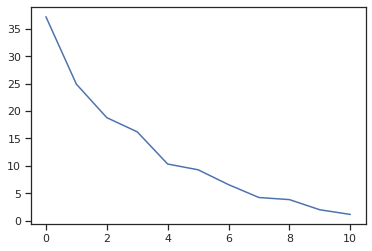

In [34]:
plt.plot(s**2)

In [35]:
pcs = u * s
pcs.shape
pcs[:,0:1].shape

(47, 1)

<AxesSubplot:>

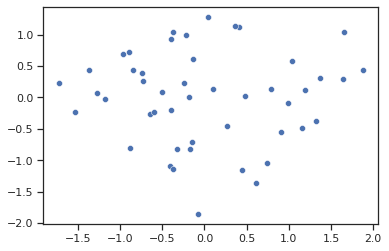

In [36]:
sns.scatterplot(x=pcs[:,0], y=pcs[:,1])

In [37]:
exploringPAL = PolicyAndLGBT.drop(9).drop(28).drop(42).drop(51)
exploringPAL['PC1'] = pcs[:,0:1]
exploringPAL['PC2'] = pcs[:, 1:2]
exploringPAL['PC3'] = pcs[:, 2:3]
exploringPAL['PC4'] = pcs[:, 3:4]
cleanedPAL['PC1'] = pcs[:,0:1]
cleanedPAL['PC2'] = pcs[:, 1:2]
cleanedPAL['PC3'] = pcs[:, 2:3]
cleanedPAL['PC4'] = pcs[:, 3:4]
avgpercent = np.mean(exploringPAL.iloc[:, 3])
binaryLGBTpop = (exploringPAL.iloc[:, 3] >= avgpercent).astype(int)
exploringPAL["LGBT Population Classifier"] = binaryLGBTpop
exploringPAL.head()

,State,Region,Macro Region,% LGBT,"% Lesbian, Gay, Bisexual",% Transgender,LGBT population,"Lesbian, Gay, Bisexual Population",Transgender Population,Cannot Promote Religion,...,Stresses abstinence,Refusal skills and personal boundaries,Dating and sexual violence prevention,Religious / Cultural Pressure Index,Inclusivity / SVSH Awareness Index,PC1,PC2,PC3,PC4,LGBT Population Classifier
1,Alabama,Southeast,South,3.1,2.676068,0.596154,117000,101000,22500.0,1.0,...,1.0,1.0,1.0,4.0,3.0,-0.080008,-1.861130,0.298115,-0.738454,0
2,Alaska,West,West,3.7,3.347619,0.475714,21000,19000,2700.0,0.0,...,0.0,0.0,1.0,4.0,2.0,-0.961725,0.685142,0.515058,0.050059,0
3,Arizona,Southwest,South,4.5,4.090909,0.569008,242000,220000,30600.0,1.0,...,1.0,1.0,1.0,4.0,4.0,0.266475,-0.459421,0.820335,0.760881,1
4,Arkansas,Southeast,South,3.3,2.865789,0.581842,76000,66000,13400.0,0.0,...,1.0,1.0,1.0,5.0,4.0,-0.878157,-0.802305,0.336435,-0.151176,0
5,California,West,West,5.3,4.784768,0.716731,1615000,1458000,218400.0,1.0,...,0.0,1.0,1.0,0.0,7.0,1.653443,1.049346,0.824355,-0.365385,1


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

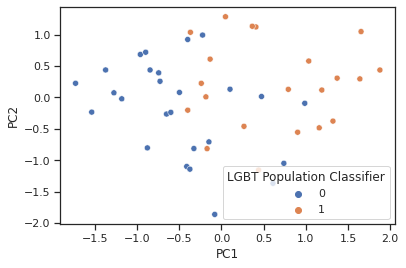

In [38]:
sns.scatterplot(data = exploringPAL, x = 'PC1', y = 'PC2', hue = "LGBT Population Classifier")

### Thoughts
- okay, so we see here that PCA in 2 dimensions raises the accuracy very significantly, so as the math backs up, performing PCA in 4 dimensions should capture the vast majority of our variance **(77.5912%)**

## 3.2 - Beginning Feature Identification

In [39]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [40]:
optionorientationandboundaries = exploringPAL['Refusal skills and personal boundaries'].to_numpy()
optionorientationandboundaries = optionorientationandboundaries + exploringPAL['Opt-out allowed'].to_numpy()
optionorientationandboundaries = optionorientationandboundaries + exploringPAL['HIV/STI includes: Sexual orientation'].to_numpy()
exploringPAL['Opt-out, Sexuality, and Boundaries index'] = optionorientationandboundaries
exploringPAL['Jittered Opt-out, Sexuality, and Boundaries index'] = optionorientationandboundaries
exploringPAL.head()

,State,Region,Macro Region,% LGBT,"% Lesbian, Gay, Bisexual",% Transgender,LGBT population,"Lesbian, Gay, Bisexual Population",Transgender Population,Cannot Promote Religion,...,Dating and sexual violence prevention,Religious / Cultural Pressure Index,Inclusivity / SVSH Awareness Index,PC1,PC2,PC3,PC4,LGBT Population Classifier,"Opt-out, Sexuality, and Boundaries index","Jittered Opt-out, Sexuality, and Boundaries index"
1,Alabama,Southeast,South,3.1,2.676068,0.596154,117000,101000,22500.0,1.0,...,1.0,4.0,3.0,-0.080008,-1.861130,0.298115,-0.738454,0,0.0,0.0
2,Alaska,West,West,3.7,3.347619,0.475714,21000,19000,2700.0,0.0,...,1.0,4.0,2.0,-0.961725,0.685142,0.515058,0.050059,0,1.0,1.0
3,Arizona,Southwest,South,4.5,4.090909,0.569008,242000,220000,30600.0,1.0,...,1.0,4.0,4.0,0.266475,-0.459421,0.820335,0.760881,1,2.0,2.0
4,Arkansas,Southeast,South,3.3,2.865789,0.581842,76000,66000,13400.0,0.0,...,1.0,5.0,4.0,-0.878157,-0.802305,0.336435,-0.151176,0,1.0,1.0
5,California,West,West,5.3,4.784768,0.716731,1615000,1458000,218400.0,1.0,...,1.0,0.0,7.0,1.653443,1.049346,0.824355,-0.365385,1,3.0,3.0


In [41]:
slightnoise = np.random.normal(0, 0.1, [47,1])
exploringPAL.iloc[:, -2:-1] +=slightnoise

exploringPAL.head()

,State,Region,Macro Region,% LGBT,"% Lesbian, Gay, Bisexual",% Transgender,LGBT population,"Lesbian, Gay, Bisexual Population",Transgender Population,Cannot Promote Religion,...,Dating and sexual violence prevention,Religious / Cultural Pressure Index,Inclusivity / SVSH Awareness Index,PC1,PC2,PC3,PC4,LGBT Population Classifier,"Opt-out, Sexuality, and Boundaries index","Jittered Opt-out, Sexuality, and Boundaries index"
1,Alabama,Southeast,South,3.1,2.676068,0.596154,117000,101000,22500.0,1.0,...,1.0,4.0,3.0,-0.080008,-1.861130,0.298115,-0.738454,0,-0.127616,0.0
2,Alaska,West,West,3.7,3.347619,0.475714,21000,19000,2700.0,0.0,...,1.0,4.0,2.0,-0.961725,0.685142,0.515058,0.050059,0,1.077861,1.0
3,Arizona,Southwest,South,4.5,4.090909,0.569008,242000,220000,30600.0,1.0,...,1.0,4.0,4.0,0.266475,-0.459421,0.820335,0.760881,1,2.142289,2.0
4,Arkansas,Southeast,South,3.3,2.865789,0.581842,76000,66000,13400.0,0.0,...,1.0,5.0,4.0,-0.878157,-0.802305,0.336435,-0.151176,0,1.202033,1.0
5,California,West,West,5.3,4.784768,0.716731,1615000,1458000,218400.0,1.0,...,1.0,0.0,7.0,1.653443,1.049346,0.824355,-0.365385,1,3.003583,3.0


Text(0.5, 1.0, 'Jittered Opt-out, Sexuality, and Boundaries index vs. % LGBT Population')

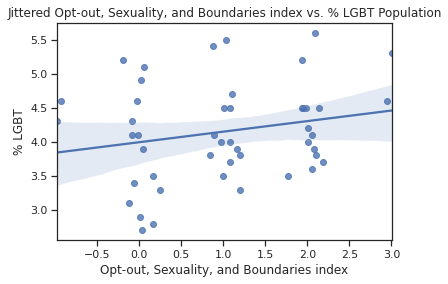

In [42]:
sns.regplot(data = exploringPAL, x = "Opt-out, Sexuality, and Boundaries index", y = "% LGBT")
plt.title("Jittered Opt-out, Sexuality, and Boundaries index vs. % LGBT Population")

In [43]:
# sns.regplot(data = exploringPAL, x = "Jittered Opt-out, Sexuality, and Boundaries index", y = "% LGBT")
# plt.title("Opt-out, Sexuality, and Boundaries index vs. % LGBT Population")

## <span style="color:blue"> Thoughts: </span>
- **Efficacy of PCA:** PCA in 2 dimensions yields a nearly accurate classifier, and the first 4 features can be seen to account for over **75%** of the variance in the data. Thus, with PCA and the knowledge of RFE feature selection, this data seems apt for prediction
- **Preliinary Feature ID:** as explored further below, Lasso and Ridge have different assumptions for which features are most reflective, plus the added loss of data we encounter with making our LGBT % into a binary classifier, lead to some need for further feature selection, since the predictor built above is lacking.

# 4.0 - Feature Selection and Classification

## 4.1 - Feature Selection

In [44]:
classifierPAL = PolicyAndLGBT.iloc[:, 3:-2].drop(['% Lesbian, Gay, Bisexual', '% Transgender',
                                              'LGBT population', 'Lesbian, Gay, Bisexual Population', 
                                              'Transgender Population'], axis = 1).drop(9).drop(28).drop(42).drop(51)
avgpercent = np.mean(classifierPAL.iloc[:, 0])
binaryLGBTpop = (classifierPAL.iloc[:, 0] >= avgpercent).astype(int)
classifierPAL["LGBT Population Classifier"] = binaryLGBTpop
classifierPAL = classifierPAL.iloc[:, 1:]

In [45]:
u, s, vt = np.linalg.svd(classifierPAL, full_matrices = False)

In [46]:
s**2 / sum(s**2)

array([0.57717654, 0.10566185, 0.09307945, 0.06148376, 0.04288593,
       0.04014249, 0.0278491 , 0.01915285, 0.01813149, 0.00951713,
       0.0049194 ])

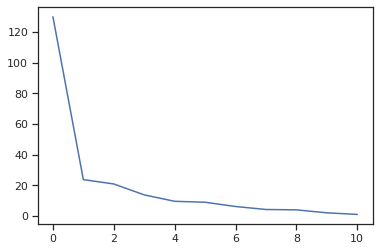

In [47]:
plt.plot(s**2)

In [48]:
# sns.scatterplot(data = classifierPAL, x = 'HIV/STI includes: Sexual orientation', y = "LGBT Population Classifier")

In [49]:
jitteredclassifierPAL = classifierPAL + np.random.normal(0, 0.1, classifierPAL.shape)
jitteredclassifierPAL["Macro Region"] = exploringPAL["Macro Region"]
jitteredclassifierPAL['Clean Binary Classifier'] = classifierPAL["LGBT Population Classifier"]
jitteredclassifierPAL.head(3)

,Cannot Promote Religion,Consent,Opt-out allowed,Contraception,HIV/STI: Stresses abstinence,HIV/STI includes: Sexual orientation,Condoms,Stresses abstinence,Refusal skills and personal boundaries,Dating and sexual violence prevention,LGBT Population Classifier,Macro Region,Clean Binary Classifier
1,0.837270,-0.117533,0.063986,1.064495,1.014766,-1.036279,0.914990,0.906452,0.983474,1.159084,0.156693,South,0
2,-0.086967,-0.041309,0.923371,0.008040,0.034570,0.070125,0.066660,0.200348,-0.052559,1.011966,-0.011753,West,0
3,1.104929,0.015862,0.978374,0.012670,0.948688,-0.053426,-0.120772,1.016950,0.862553,0.905594,1.072387,South,1


In [50]:
# sns.scatterplot(data = jitteredclassifierPAL, x = 'HIV/STI includes: Sexual orientation', 
#                 y = "LGBT Population Classifier", hue = "Macro Region")


In [51]:
X = classifierPAL.iloc[:, :-1]
y = classifierPAL.iloc[:, -1]
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef1 = pd.Series(reg.coef_, index = X.columns)
coef1

Best alpha using built-in LassoCV: 0.069690
Best score using built-in LassoCV: 0.024502


Cannot Promote Religion                   0.000000
Consent                                   0.000000
Opt-out allowed                           0.000000
Contraception                             0.000000
HIV/STI: Stresses abstinence              0.000000
HIV/STI includes: Sexual orientation      0.027328
Condoms                                   0.013587
Stresses abstinence                       0.000000
Refusal skills and personal boundaries   -0.000000
Dating and sexual violence prevention     0.000000
dtype: float64

Text(0.5, 1.0, 'Feature importance using Lasso Model')

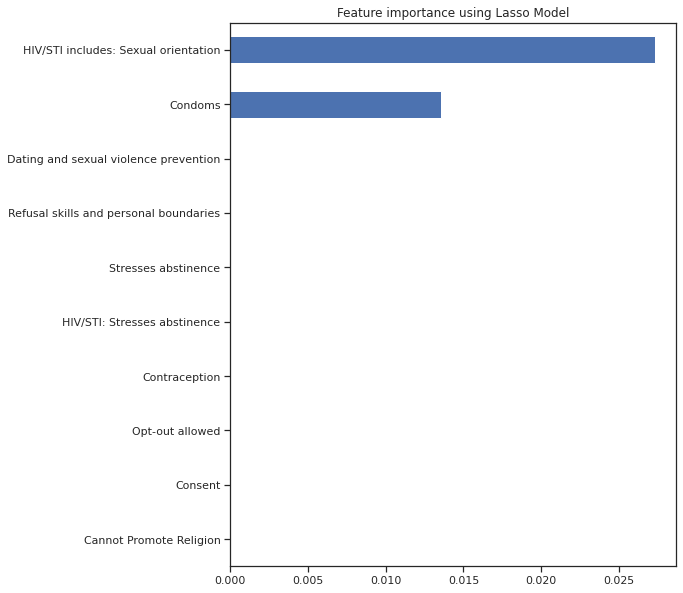

In [52]:
imp_coef = coef1.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [53]:
y = classifierPAL.iloc[:, -1]
reg = RidgeCV()
reg.fit(X, y)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,y))
coef2 = pd.Series(reg.coef_, index = X.columns)
coef2

Best alpha using built-in RidgeCV: 10.000000
Best score using built-in RidgeCV: 0.184705


Cannot Promote Religion                   0.054594
Consent                                   0.031928
Opt-out allowed                           0.016336
Contraception                             0.053018
HIV/STI: Stresses abstinence              0.047192
HIV/STI includes: Sexual orientation      0.123929
Condoms                                   0.116338
Stresses abstinence                       0.050640
Refusal skills and personal boundaries   -0.125795
Dating and sexual violence prevention     0.054508
dtype: float64

Text(0.5, 1.0, 'Feature importance using Ridge Model')

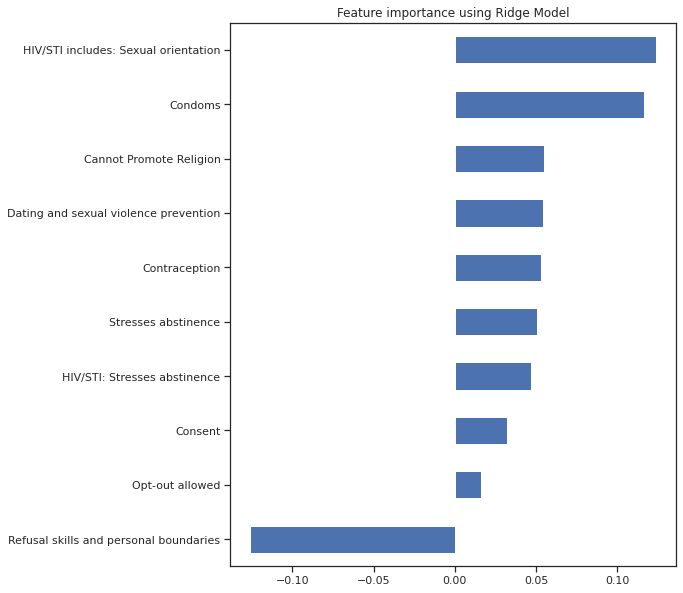

In [54]:
imp_coef = coef2.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

### Thoughts
- Here, we can see that Lasso and Ridge value a few different features more heavily, but both agree that **HIV/STI includes: Sexual orientation** is one of, if not *the* most important feature of our data
- followed closely in Ridge by **Refusal skills and personal boundaries** as aspects of Sexual Education policy

In [55]:
# sns.scatterplot(data = jitteredclassifierPAL, x = 'HIV/STI includes: Sexual orientation', 
#                 y = "Refusal skills and personal boundaries", hue = "Clean Binary Classifier")

In [56]:
# sns.scatterplot(data = jitteredclassifierPAL, x = 'HIV/STI includes: Sexual orientation', 
#                 y = "Condoms", hue = "Clean Binary Classifier")

# 4.2 - Modeling Using Classification with PCA

In [88]:
classifierPAL.head()
target = classifierPAL.iloc[:, -1]
features = classifierPAL.iloc[:, :-1]
centeredfeatures = features - np.mean(features, axis = 0)
centeredfeatures.head()

,Cannot Promote Religion,Consent,Opt-out allowed,Contraception,HIV/STI: Stresses abstinence,HIV/STI includes: Sexual orientation,Condoms,Stresses abstinence,Refusal skills and personal boundaries,Dating and sexual violence prevention
1,0.489362,-0.06383,-0.510638,0.574468,0.446809,-1.106383,0.595745,0.446809,0.638298,0.404255
2,-0.510638,-0.06383,0.489362,-0.425532,-0.553191,-0.106383,-0.404255,-0.553191,-0.361702,0.404255
3,0.489362,-0.06383,0.489362,-0.425532,0.446809,-0.106383,-0.404255,0.446809,0.638298,0.404255
4,-0.510638,-0.06383,-0.510638,-0.425532,0.446809,-0.106383,-0.404255,0.446809,0.638298,0.404255
5,0.489362,0.93617,0.489362,0.574468,-0.553191,0.893617,0.595745,-0.553191,0.638298,0.404255


In [89]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(centeredfeatures, 
                                                    target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

In [90]:
X_train.shape + X_test.shape

(32, 10, 15, 10)

## 4.1.1 - Naive Centered Classification

In [91]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(centeredfeatures, 
                                                    target,
                                                    test_size=0.3)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
print("Accuracy:", 1 - sum(abs(classifier.predict(X_test) - y_test)) / len(y_test))

Accuracy: 0.5333333333333333


## 4.1.2 PCA of Rank K Approximations (k in [1,9]) Classification

In [92]:
pcaPAL = features
pcaPAL['PC1'] = pcs[:,0:1]
pcaPAL['PC2'] = pcs[:, 1:2]
pcaPAL['PC3'] = pcs[:, 2:3]
pcaPAL['PC4'] = pcs[:, 3:4]
pcaPAL['PC5'] = pcs[:, 4:5]
pcaPAL['PC6'] = pcs[:, 5:6]
pcaPAL['PC7'] = pcs[:, 6:7]
pcaPAL['PC8'] = pcs[:, 7:8]
pcaPAL['PC9'] = pcs[:, 8:9]
pca1feature = pcaPAL.iloc[:,-9:-8]
pca2features = pcaPAL.iloc[:, -9:-7]
pca3features = pcaPAL.iloc[:, -9:-6]
pca4features = pcaPAL.iloc[:,-9:-5]
pca5features = pcaPAL.iloc[:, -9:-4]
pca6features = pcaPAL.iloc[:, -9:-3]
pca7features = pcaPAL.iloc[:, -9:-2]
pca8features = pcaPAL.iloc[:, -9:-1]
pca9features = pcaPAL.iloc[:,-9:]
pca4features.head()

,PC1,PC2,PC3,PC4
1,-0.080008,-1.861130,0.298115,-0.738454
2,-0.961725,0.685142,0.515058,0.050059
3,0.266475,-0.459421,0.820335,0.760881
4,-0.878157,-0.802305,0.336435,-0.151176
5,1.653443,1.049346,0.824355,-0.365385


In [93]:
kpcas = [pca1feature, pca2features, pca3features, pca4features, pca5features, 
         pca6features,pca7features,pca8features,pca9features]
# RANDOM_STATE = 42
index = 0
for kdimfeatures in kpcas:
    X_trainpca2, X_testpca2, y_trainpca2, y_testpca2 = train_test_split(kdimfeatures, 
                                                        target,
                                                        test_size=0.3)
    pcaclassifier = GaussianNB()
    pcaclassifier.fit(X_trainpca2, y_trainpca2)
    print("k =", index + 1, "approximation accuracy:", 
          1 - sum(abs(pcaclassifier.predict(X_testpca2) - y_testpca2)) / len(y_testpca2))
    index += 1

k = 1 approximation accuracy: 0.4666666666666667
k = 2 approximation accuracy: 0.6666666666666667
k = 3 approximation accuracy: 0.4666666666666667
k = 4 approximation accuracy: 0.4666666666666667
k = 5 approximation accuracy: 0.4666666666666667
k = 6 approximation accuracy: 0.5333333333333333
k = 7 approximation accuracy: 0.5333333333333333
k = 8 approximation accuracy: 0.6666666666666667
k = 9 approximation accuracy: 0.5333333333333333


In [94]:
kpcas = [pca1feature, pca2features, pca3features, pca4features, pca5features, 
         pca6features,pca7features,pca8features,pca9features]
# RANDOM_STATE = 42
index = 0
for kdimfeatures in kpcas:
    X_trainpca2, X_testpca2, y_trainpca2, y_testpca2 = train_test_split(kdimfeatures, 
                                                        target,
                                                        test_size=0.40)
    pcaclassifier = GaussianNB()
    pcaclassifier.fit(X_trainpca2, y_trainpca2)
    print("k =", index + 1, "approximation accuracy:", 
          1 - sum(abs(pcaclassifier.predict(X_testpca2) - y_testpca2)) / len(y_testpca2))
    index += 1

k = 1 approximation accuracy: 0.6842105263157895
k = 2 approximation accuracy: 0.4736842105263158
k = 3 approximation accuracy: 0.736842105263158
k = 4 approximation accuracy: 0.631578947368421
k = 5 approximation accuracy: 0.4736842105263158
k = 6 approximation accuracy: 0.5263157894736843
k = 7 approximation accuracy: 0.42105263157894735
k = 8 approximation accuracy: 0.42105263157894735
k = 9 approximation accuracy: 0.5263157894736843


## 4.3 - Feature Selection Classification (5 Best Features by RFE)

In [95]:
centeredfeatures.head()

,Cannot Promote Religion,Consent,Opt-out allowed,Contraception,HIV/STI: Stresses abstinence,HIV/STI includes: Sexual orientation,Condoms,Stresses abstinence,Refusal skills and personal boundaries,Dating and sexual violence prevention
1,0.489362,-0.06383,-0.510638,0.574468,0.446809,-1.106383,0.595745,0.446809,0.638298,0.404255
2,-0.510638,-0.06383,0.489362,-0.425532,-0.553191,-0.106383,-0.404255,-0.553191,-0.361702,0.404255
3,0.489362,-0.06383,0.489362,-0.425532,0.446809,-0.106383,-0.404255,0.446809,0.638298,0.404255
4,-0.510638,-0.06383,-0.510638,-0.425532,0.446809,-0.106383,-0.404255,0.446809,0.638298,0.404255
5,0.489362,0.93617,0.489362,0.574468,-0.553191,0.893617,0.595745,-0.553191,0.638298,0.404255


In [96]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=1, step=1)
selector.fit(centeredfeatures, target)
selector.ranking_

array([ 7,  2,  5,  1,  8,  3,  9, 10,  6,  4])

In [97]:
rfefeatures = centeredfeatures.drop(['Cannot Promote Religion',
                                     'Opt-out allowed',
                                     'Contraception',
                                     'HIV/STI: Stresses abstinence',
                                     'Stresses abstinence'], axis = 1)
rfefeatures.head()

,Consent,HIV/STI includes: Sexual orientation,Condoms,Refusal skills and personal boundaries,Dating and sexual violence prevention
1,-0.06383,-1.106383,0.595745,0.638298,0.404255
2,-0.06383,-0.106383,-0.404255,-0.361702,0.404255
3,-0.06383,-0.106383,-0.404255,0.638298,0.404255
4,-0.06383,-0.106383,-0.404255,0.638298,0.404255
5,0.93617,0.893617,0.595745,0.638298,0.404255


In [240]:
X_train, X_test, y_train, y_test = train_test_split(rfefeatures, 
                                                    target,
                                                    test_size=0.3)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
print("Accuracy:", 1 - sum(abs(classifier.predict(X_test) - y_test)) / len(y_test))

Accuracy: 0.4666666666666667


In [99]:
u, s, vt = np.linalg.svd(rfefeatures, full_matrices = False)

In [100]:
rfepcs = u * s

In [101]:
s

array([4.27905642, 4.1625238 , 3.2431879 , 2.04650242, 1.55646693])

## <span style="color:blue"> Thoughts: </span>
- Super interestingly, the RFE data strongly suggests that sexual education involving sexuality and tolerance is a significant predictor of LGBT population, a promising result for this study
- Beyond the most significant feature, the binary classification seems to not lean as heavily on individual features as the numeric predictor, prompting that perhaps one is more effective than the other. In the following sections, I will try to assess that question and arrive at the optimal modeling tool
- As seen above, there are a few remaining challenges before I can conclude, namely:
    * **What model is most effective?**
    * **Which features are truly the most significant?** (although now we have some idea)
    * **Can this data be reasonably used to build a binary classifier given its size and dimensions?**

# 5 - A/B Testing and Statistical Significance

In [231]:
# assuming p = 0.05, now we're going to investigate our table with classifications shuffled
randomtarget = target.copy()
np.random.shuffle(randomtarget.to_numpy())

In [232]:
shuffledPAL = classifierPAL.copy()
shuffledPAL = shuffledPAL.iloc[:,:-1]
shuffledPAL['shuffled LGBT classifier'] = randomtarget
shuffledgroups = shuffledPAL.groupby(by="shuffled LGBT classifier").mean()
realgroups = classifierPAL.groupby(by='LGBT Population Classifier').mean()
shuffledgroups

,Cannot Promote Religion,Consent,Opt-out allowed,Contraception,HIV/STI: Stresses abstinence,HIV/STI includes: Sexual orientation,Condoms,Stresses abstinence,Refusal skills and personal boundaries,Dating and sexual violence prevention
shuffled LGBT classifier,,,,,,,,,,
0,0.384615,0.038462,0.538462,0.346154,0.500000,0.038462,0.346154,0.615385,0.384615,0.576923
1,0.666667,0.095238,0.476190,0.523810,0.619048,0.190476,0.476190,0.476190,0.333333,0.619048


In [200]:
realgroups

,Cannot Promote Religion,Consent,Opt-out allowed,Contraception,HIV/STI: Stresses abstinence,HIV/STI includes: Sexual orientation,Condoms,Stresses abstinence,Refusal skills and personal boundaries,Dating and sexual violence prevention
LGBT Population Classifier,,,,,,,,,,
0,0.538462,0.115385,0.615385,0.384615,0.653846,0.076923,0.346154,0.576923,0.423077,0.538462
1,0.476190,0.000000,0.380952,0.476190,0.428571,0.142857,0.476190,0.523810,0.285714,0.666667


## 5.1 - Permutation Test for Significance of Features

In [194]:
def meandifferencefunction(colofinterest):
    return colofinterest[1] - colofinterest[0]

In [198]:
def permutationdiffmeanshuffle(df, classifiercol, colofinterest, numtrials, teststatfunc):
    """A function to generate numtrials results of a statistic teststatfunc on a colofinterest by randomly shuffling 
    colofinterest."""
    results = []
    randomclassifiercol = df[classifiercol].copy()
    
    for i in np.arange(numtrials):
        shuffleddf = df.copy()
        shuffleddf = shuffleddf.iloc[:,:-1]
        np.random.shuffle(randomclassifiercol.to_numpy())
        shuffleddf['shuffled classifier'] = randomclassifiercol
        shuffledgroups = shuffleddf.groupby(by="shuffled classifier").mean()
        results.append(teststatfunc(shuffledgroups[colofinterest]))
    return results

### 5.1.1 - Permutation Test for Significance of Sexual Orientation Training

p-value is 0.477


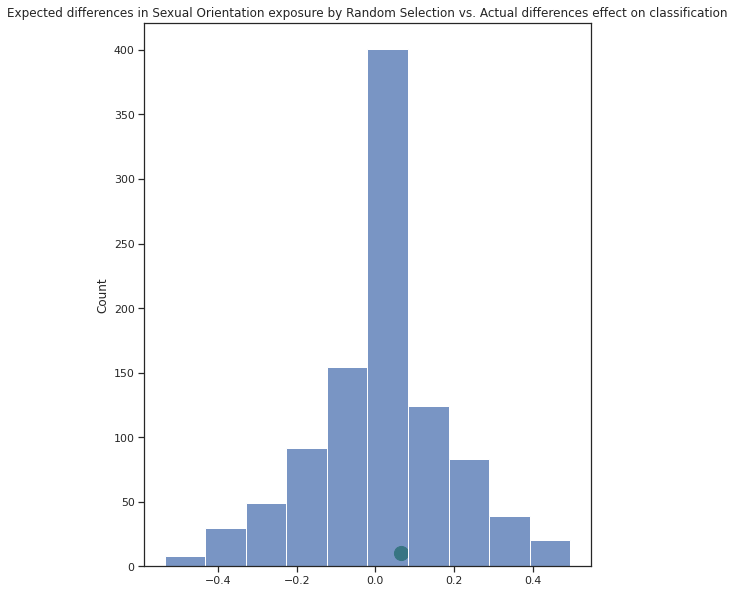

In [255]:
expected_diffs = permutationdiffmeanshuffle(classifierPAL, 'LGBT Population Classifier',
                                            'HIV/STI includes: Sexual orientation', 1000, meandifferencefunction)
true_diff = meandifferencefunction(realgroups['HIV/STI includes: Sexual orientation'])
sns.histplot(expected_diffs, bins = 10)
plt.scatter(true_diff, 10, marker='o', s=200, color = 'green')
plt.title("Expected differences in Sexual Orientation exposure by Random Selection vs. Actual differences effect on classification")
print("p-value is", sum(expected_diffs >= true_diff) / len(expected_diffs))

### 5.1.2 - Permutation Test for Significance of Consent Training

p-value is 0.166


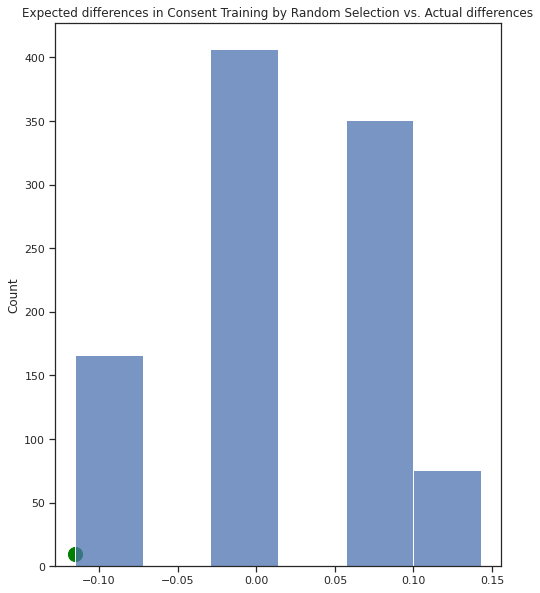

In [222]:
expected_diffs = permutationdiffmeanshuffle(classifierPAL, 'LGBT Population Classifier',
                                            'Consent', 1000, meandifferencefunction)
true_diff = meandifferencefunction(realgroups['Consent'])
sns.histplot(expected_diffs, bins = 6)
plt.scatter(true_diff, 10, marker='o', s=200, color = 'green')
plt.title("Expected differences in Consent Training by Random Selection vs. Actual differences effect on classification")
print("p-value is", sum(expected_diffs <= true_diff) / len(expected_diffs))

### 5.1.3 - Permutation Test for Significance of Opt-Out in Sex. Ed. Training

p-value is 0.122


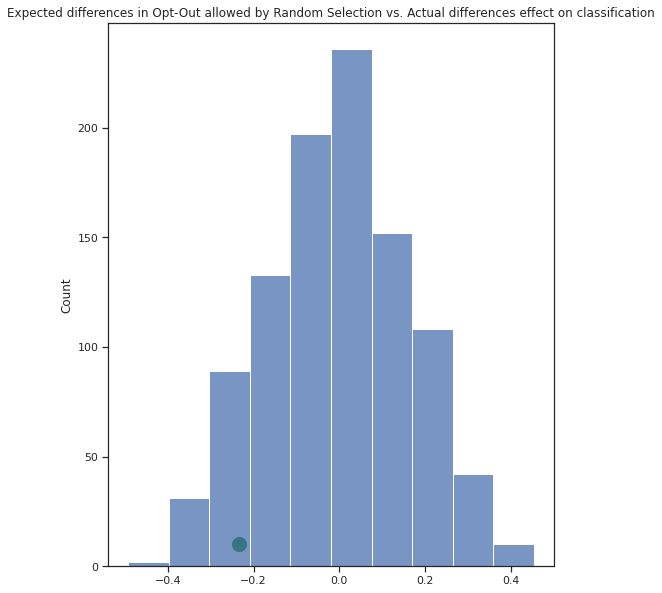

In [225]:
expected_diffs = permutationdiffmeanshuffle(classifierPAL, 'LGBT Population Classifier',
                                            'Opt-out allowed', 1000, meandifferencefunction)
true_diff = meandifferencefunction(realgroups['Opt-out allowed'])
sns.histplot(expected_diffs, bins = 10)
plt.scatter(true_diff, 10, marker='o', s=200, color = 'green')
plt.title("Expected differences in Opt-Out allowed by Random Selection vs. Actual differences effect on classification")
print("p-value is", sum(expected_diffs <= true_diff) / len(expected_diffs))

### 5.1.4 - Permutation Test for Significance of Refusal Skills and Boundaries Training

p-value is 0.264


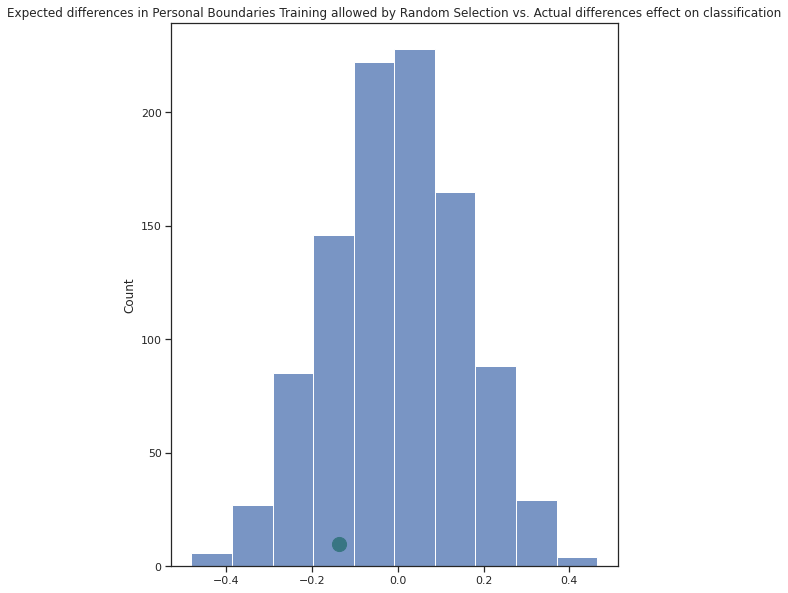

In [226]:
expected_diffs = permutationdiffmeanshuffle(classifierPAL, 'LGBT Population Classifier',
                                            'Refusal skills and personal boundaries', 1000, meandifferencefunction)
true_diff = meandifferencefunction(realgroups['Refusal skills and personal boundaries'])
sns.histplot(expected_diffs, bins = 10)
plt.scatter(true_diff, 10, marker='o', s=200, color = 'green')
plt.title("Expected differences in Personal Boundaries Training allowed by Random Selection vs. Actual differences effect on classification")
print("p-value is", sum(expected_diffs <= true_diff) / len(expected_diffs))

### 5.1.5 - Permutation Test for Significance of Religious Promotion Allowance

p-value is 0.466


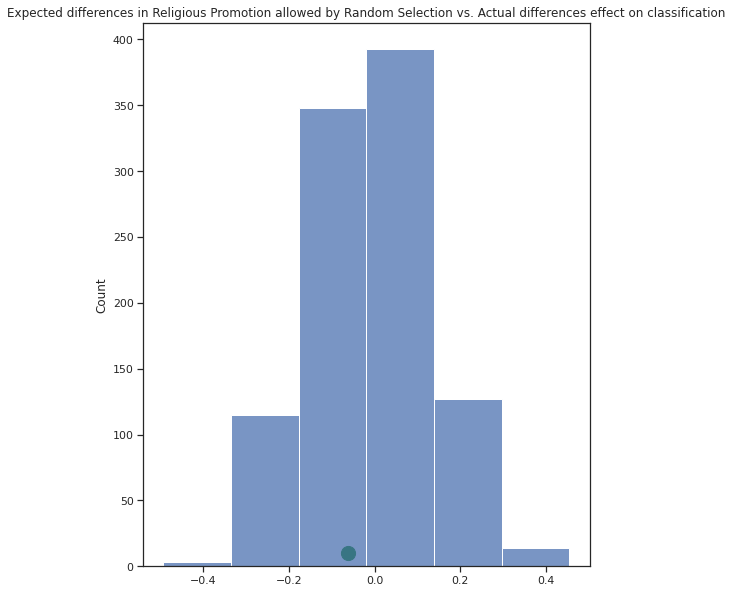

In [234]:
expected_diffs = permutationdiffmeanshuffle(classifierPAL, 'LGBT Population Classifier',
                                            'Cannot Promote Religion', 1000, meandifferencefunction)
true_diff = meandifferencefunction(realgroups['Cannot Promote Religion'])
sns.histplot(expected_diffs, bins = 6)
plt.scatter(true_diff, 10, marker='o', s=200, color = 'green')
plt.title("Expected differences in Religious Promotion allowed by Random Selection vs. Actual differences effect on classification")
print("p-value is", sum(expected_diffs <= true_diff) / len(expected_diffs))

## <span style="color:blue"> Thoughts: </span>
- Curiously, the statistical significance, or potential rarity of distribution of certain features is similar and different to the RFE selection of predictive features
- The most significant feature compared to distribution of "high" and "low" LGBT population was **consent training**, due in some part to a very low number of states offering consent training, but certainly associating the education with a higher LGBT population
- The other most statistically significant feature was the opt-out option, which also seems to reflect that this feature presents differently in class 0 vs. class 1 states.

These relationships are explored more deeply below.

# 6 - Concluding Plots and Thoughts

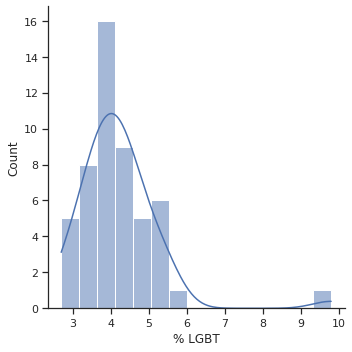

In [243]:
sns.displot(x = PolicyAndLGBT["% LGBT"], kde=True)

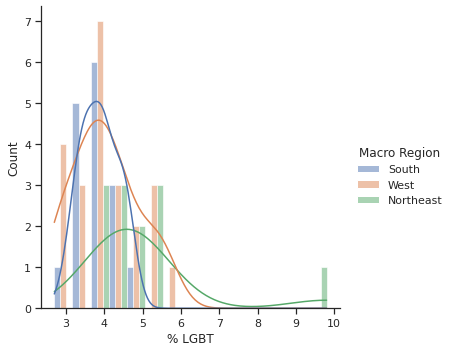

In [246]:
sns.displot(x = PolicyAndLGBT["% LGBT"],
            hue = PolicyAndLGBT['Macro Region'], multiple = "dodge", kde=True)

the breakdown by region is the **largest confounding variable** in this data, since macro region is very obviously correlated with LGBT population, or at least the distribution thereof by region. Thus, the above permutation testing was meant to correct for some of this natural imbalance.

Text(0.5, 1.0, 'Using PCA to Visualize classification in K=2')

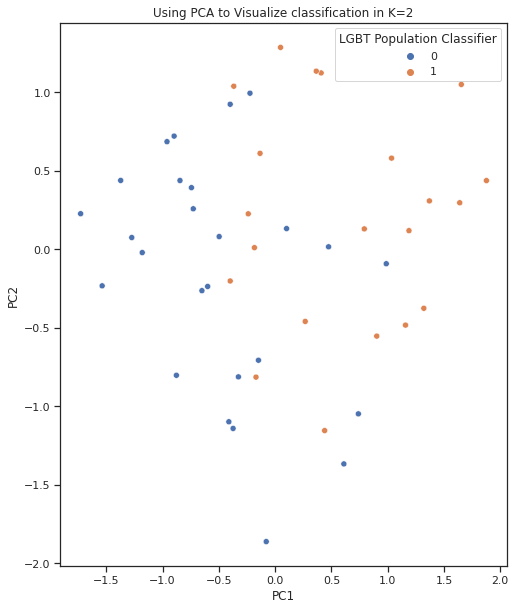

In [236]:
sns.scatterplot(data = exploringPAL, x = 'PC1', y = 'PC2', hue = "LGBT Population Classifier")
plt.title("Using PCA to Visualize classification in K=2")

Though classification was only successful on a limited scale, the PCA evaluation shows that along certain axes, the distribution of class 0 and class 1 states is relatively clear, but in two dimensions is still **visually overlapping** along the area where PC1 = 0.

p-value is 0.102


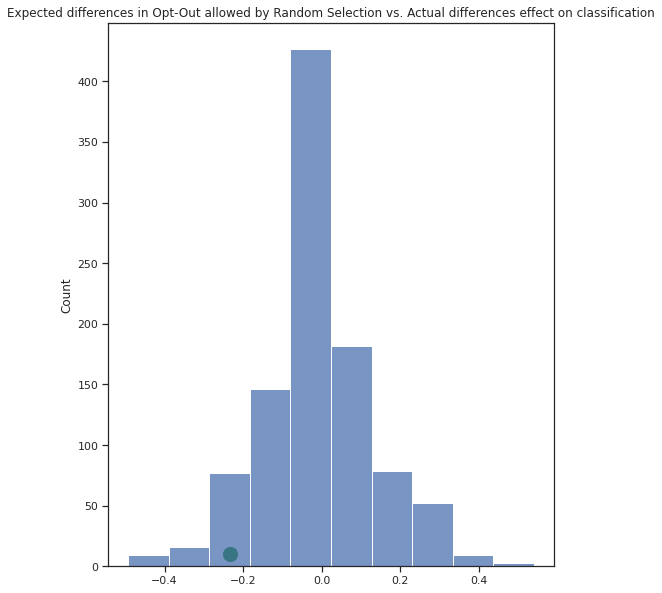

In [242]:
expected_diffs = permutationdiffmeanshuffle(classifierPAL, 'LGBT Population Classifier',
                                            'Opt-out allowed', 1000, meandifferencefunction)
true_diff = meandifferencefunction(realgroups['Opt-out allowed'])
sns.histplot(expected_diffs, bins = 10)
plt.scatter(true_diff, 10, marker='o', s=200, color = 'green')
plt.title("Expected differences in Opt-Out allowed by Random Selection vs. Actual differences effect on classification")
print("p-value is", sum(expected_diffs <= true_diff) / len(expected_diffs))

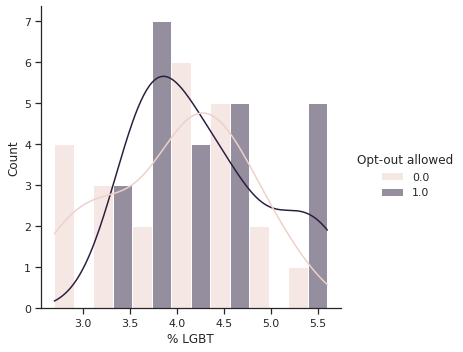

In [247]:
sns.displot(x = PolicyAndLGBT["% LGBT"],
            hue = PolicyAndLGBT['Opt-out allowed'], multiple = "dodge", kde=True)

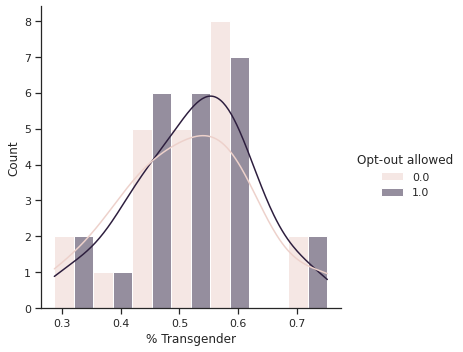

In [253]:
sns.displot(x = PolicyAndLGBT["% Transgender"],
            hue = PolicyAndLGBT['Opt-out allowed'], multiple = "dodge", kde=True)

Here is a specific application of the knowledge that opt-out is deeply correlated with % LGBT, **though visually much less correlated with % Transgender** in a given state. Thus, for more robust analysis of any LGBT subgroups, separate statistical testing would have to be performed.

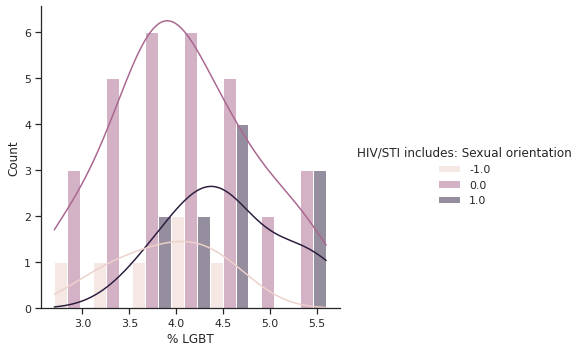

In [250]:
sns.displot(x = PolicyAndLGBT["% LGBT"],
            hue = PolicyAndLGBT['HIV/STI includes: Sexual orientation'], multiple = "dodge", kde=True)

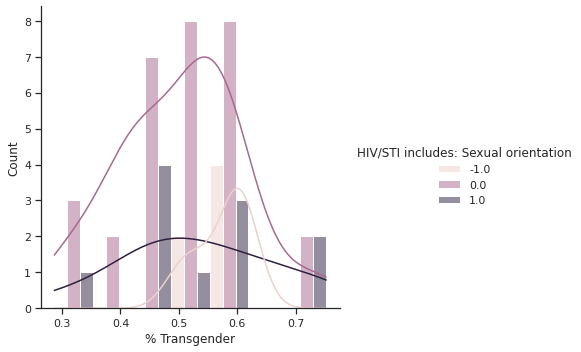

In [251]:
sns.displot(x = PolicyAndLGBT["% Transgender"],
            hue = PolicyAndLGBT['HIV/STI includes: Sexual orientation'], multiple = "dodge", kde=True)

## <span style="color:blue"> Thoughts: </span>
- Overall, the most significant results can be enumerated as:
    1. **Sexual Orientation Education** is the most significantly correlated Sexual Education Policy with high LGBT popoulations in a given state
    2. No other individual feature has a strong predictive relationship with LGBT population, but all features together have some robust classification power, as illustrated by RFE informed classification (up to 80% accuracy) and PCA informed classification (up to 90% accuracy)
        * however, this classification isn't always statistically significant, ranging as low as 50% for RFE classification, expressing that these features are certainly not the strongest predictors of LGBT population
    3. Predictive features for % LGBT are distinct from predictive features for % transgender and other subgroups within the LGBT community, as noted by an investigation of statistically significant features for % LGBT against other groups